In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import skew

In [2]:

fichero = pd.read_csv("data/coste_vida_reducido.csv")

In [4]:
# Vamos a separar los datos y centrarnos en los paises con más netradas para hacer los ejercicios,
# que son Estados Unidos, India, Brazil, Italia y Reino Unido.

In [5]:
fichero_5_paises = fichero[(fichero["country"] == "United States") | (fichero["country"] == "Italy") | (fichero["country"] == "India") | (fichero["country"] == "Brazil") | (fichero["country"] == "United Kingdom")]

Seguimos trabajando con dataset de estos días anteriores

1- Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia
- Coeficiente de correlación de las variables numéricas del dataset.
- Sesgos de alguna de las variables numéricas del dataset.
- Intervalo de confianza de algunas de las variables numéricas del dataset

In [6]:
#Tabla de contingencia

In [3]:
# Sacamos el q1 y el q3 para tener de referencia y crear una columna categorica sobre la columna "x54" que es el sueldo.
# Creamos esta columna nueva porque nos será necesaria una variable categórica para crear la tabla de contingencia

q1, q3 = np.nanpercentile(fichero["Salario neto mensual"], [25, 75])

In [4]:
def cat_sueldo(column): 
    if column <= q1:
        return "Bajo"
    elif q1 < column <=q3:
        return "Medio"
    else:
        return "Alto"


fichero["categoria_sueldo"] = (fichero["Salario neto mensual"].apply(cat_sueldo))

In [7]:
# Comprobamos que se ha creado correctamente la nueva columna categórica.

fichero.sample()

,Unnamed: 0,ciudad,pais,leche,arroz,huevos,filetes de pollo,manzanas,tomates,Apartamento 1 habitación centro,Apartamento 1 habitación fuera del centro,Apartamento tres habitaciones en centro,tres habitaciones fuera centro,Precio por metro cuadrado en centro,Precio por metro cuadrado fuera centro,Salario neto mensual,pesos_pais,categoria_sueldo
463,1655,Aberdeen,United Kingdom,1.16,1.58,2.57,5.94,2.54,2.11,656.17,533.32,1426.4,936.25,2917.14,2419.51,2696.89,161,Medio


In [8]:
# Creamos el crosstab

tabla_contingencia_in = pd.crosstab(fichero["categoria_sueldo"], fichero["pais"])
tabla_contingencia_in

pais,Brazil,India,Italy,United Kingdom,United States
categoria_sueldo,,,,,
Alto,48,46,34,42,725
Bajo,118,121,41,1,3
Medio,0,0,110,118,346


In [11]:
# Estos valores están "alterados" ya que se han basado para categorizar los sueldos con los cuartiles de todos los paises, de los cuales Estados Unidos 
# tienen un mayor peso, ya que tiene más de 1000 entradas respecto a los 160 de Reino Unido por ejemplo, por tanto la media no estará ajustada a todas 
# las localidades, pero para probar el ejercicio lo hemos hecho así.

In [10]:
# Correlación variables numéricas

correlacion_num_in = fichero.corr()
correlacion_num_in

/var/folders/66/3gn2x5sj3tlfxjp4wp1zg9n00000gn/T/ipykernel_12217/662256889.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_num_in = fichero.corr()


,Unnamed: 0,leche,arroz,huevos,filetes de pollo,manzanas,tomates,Apartamento 1 habitación centro,Apartamento 1 habitación fuera del centro,Apartamento tres habitaciones en centro,tres habitaciones fuera centro,Precio por metro cuadrado en centro,Precio por metro cuadrado fuera centro,Salario neto mensual,pesos_pais
Unnamed: 0,1.000000,0.172092,0.232663,0.269780,0.241533,0.238723,0.295220,0.148757,0.186831,0.131906,0.203064,0.037502,0.173655,0.188197,0.288067
leche,0.172092,1.000000,0.262847,0.503377,0.283544,0.130392,0.287883,0.370569,0.374478,0.372969,0.383260,0.376408,0.379016,0.237533,0.064060
arroz,0.232663,0.262847,1.000000,0.571428,0.605763,0.651685,0.675998,0.623782,0.645902,0.617335,0.627705,0.345855,0.394170,0.625875,0.685229
huevos,0.269780,0.503377,0.571428,1.000000,0.601790,0.497462,0.598396,0.627245,0.654950,0.603430,0.612150,0.406026,0.504975,0.553160,0.542976
filetes de pollo,0.241533,0.283544,0.605763,0.601790,1.000000,0.562413,0.557175,0.577378,0.567072,0.538172,0.553491,0.287936,0.354895,0.513443,0.588554
manzanas,0.238723,0.130392,0.651685,0.497462,0.562413,1.000000,0.714731,0.569432,0.582559,0.575273,0.575909,0.275317,0.344164,0.638960,0.714968
tomates,0.295220,0.287883,0.675998,0.598396,0.557175,0.714731,1.000000,0.634026,0.658109,0.593541,0.623258,0.337168,0.404863,0.628406,0.665361
Apartamento 1 habitación centro,0.148757,0.370569,0.623782,0.627245,0.577378,0.569432,0.634026,1.000000,0.944683,0.916915,0.907325,0.622993,0.637668,0.783259,0.667978
Apartamento 1 habitación fuera del centro,0.186831,0.374478,0.645902,0.654950,0.567072,0.582559,0.658109,0.944683,1.000000,0.879360,0.926096,0.580803,0.651231,0.785115,0.700231
Apartamento tres habitaciones en centro,0.131906,0.372969,0.617335,0.603430,0.538172,0.575273,0.593541,0.916915,0.879360,1.000000,0.922754,0.641593,0.638981,0.755838,0.628849


/var/folders/66/3gn2x5sj3tlfxjp4wp1zg9n00000gn/T/ipykernel_12217/1792781358.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fichero.corr(),cmap = "mako", annot = True, vmin = -1,vmax = 1);


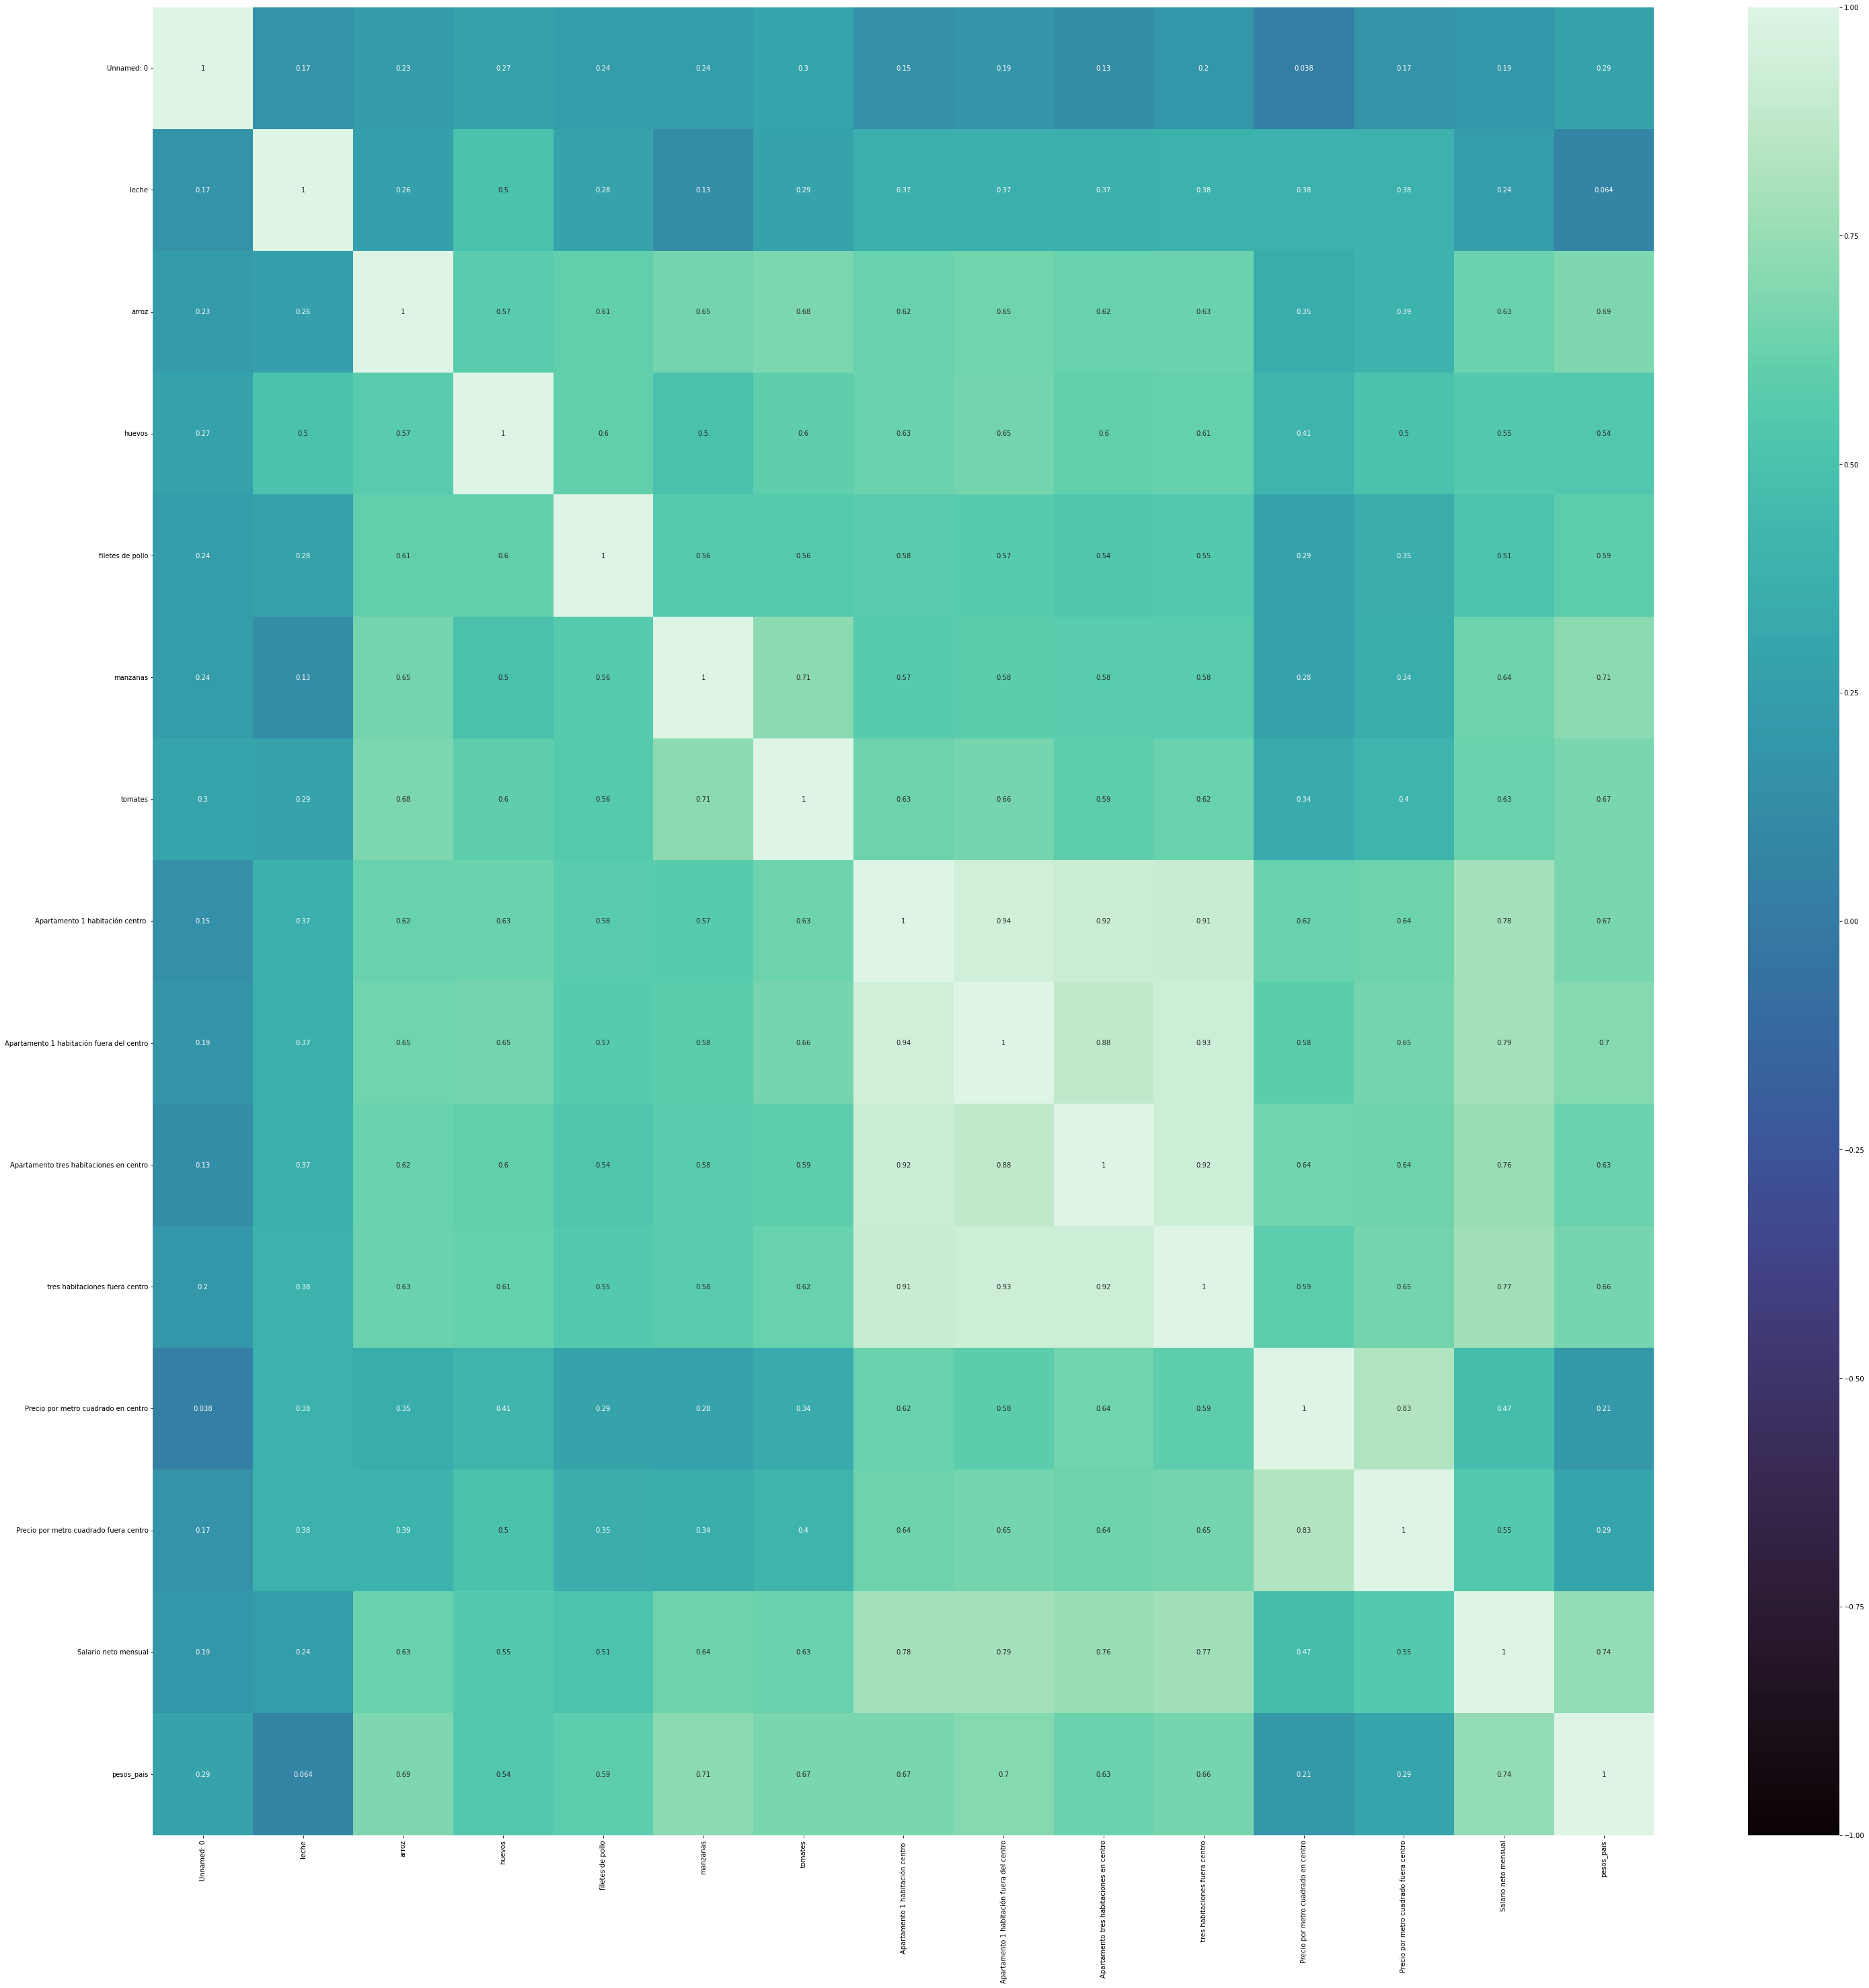

In [11]:
# Sabemos que esto es una locura para interpretarlo, pero queríamos verlo.
# Para poder tener un hetmap con más legilibilidad debería tener menos columnas

plt.figure(figsize = (50,50))

sns.heatmap(fichero.corr(),cmap = "mako", annot = True, vmin = -1,vmax = 1);

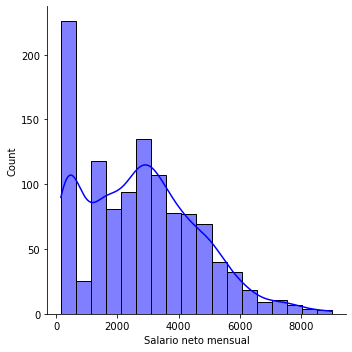

In [12]:
# Sesgos de alguna de las variables numéricas del dataset.

sns.displot(fichero["Salario neto mensual"], color="blue", kde= True);

In [13]:
# Creamos una copia del fichero sin nan para poder calcular el skewness

fichero_sin_nulos = fichero.copy()

fichero_sin_nulos = fichero_sin_nulos.dropna(subset= ["Salario neto mensual"])

In [14]:
skewness = round(skew(fichero_sin_nulos["Salario neto mensual"]), 2)

print(f"El sesgo para la variable sueldo es de {skewness}, vemos que es un sesgo positivo, con tendencia a la derecha")


El sesgo para la variable sueldo es de 0.52, vemos que es un sesgo positivo, con tendencia a la derecha


In [15]:
#Intervalo de confianza de algunas de las variables numéricas del dataset

datos = fichero_sin_nulos["Salario neto mensual"]

intervalo_con = st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos))
print(f"El intervalo de confianza es de {intervalo_con}, que comparado con su media es {np.mean(datos)}")

El intervalo de confianza es de (2646.3437070317736, 2860.963594555528), que comparado con su media es 2753.6536507936507


2- Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Queremos señalar que este estudio lo hemos enfocado a sacar números y sacar ejercicios para poder experimentar y ver resultados, auqnue no tienen mucho sentido los datos por el filtro que hemos realizado. Ya que la media de Estados unidos es muy alta y no nos da una realidad de paises como India o Brazil, que se alejan bastante al ver sus medias(que hemos podido ver en otros pairs), y les dan una media muy alta.

Entendemos con estos pairs y estos datos la importancia de saber categorizarlos mejor, de limpiarlos y de calcular el tiempo mejor para ajustar el ejercicio a la
realidad de tiempo y ofrecer un mejor resultado.

In [16]:
#si tenemos oportunidad a trabajar de vuelta con este database guardamos un nuevo csv con los cambios.

fichero.to_csv("archive/coste_vida_reducido_2.csv")